# Linear Models

## Lecture Learning Objectives 

- Explain the general intuition behind linear models.
- Explain the main concepts of the advantages of Ridge regression.
- Explain the `fit` and `predict` paradigm of linear models.
- Use `scikit-learn`'s `LogisticRegression` classifier.
    - Use `fit`, `predict` and `predict_proba`.   
    - Use `coef_` to interpret the model weights.
- Explain the advantages and limitations of linear classifiers. 
- Apply scikit-learn regression model (e.g., Ridge) to regression problems.
- Relate the Ridge hyperparameter `alpha` to the `LogisticRegression` hyperparameter `C`.
- Compare logistic regression with naive Bayes.

## Five Minute Recap/ Lightning Questions 

- To avoid the problem of zero probability in Naïve Bayes, what technique do we use?
- What is the name of the function we use to perform Exhaustive Hyperparameter Optimization?
- What parameter does `RandomizedSearchCV` have that the Exhaustive Hyperparameter tuning function not have? 
- Repeating cross-validation over and over again with different hyperparameters can cause our model to suffer from what? 

### Some lingering questions

- Is linear regression used in Machine Learning or just in Stats?
- Can we use a linear model as a classifier?
- What was that `predict_proba` function we looked at briefly when learning about naive Bayes?

## Linear Regression

We've seen many regression models such as:
- `DecisionTreeRegressor` 
- `KNeighborsRegressor`
- `SVR`

but now we have a new one that we are going to explore called  **linear regression**.
You might have encountered linear regression previously,
as it is one of the most basic and popular ML/statistical techniques.

### Brief explanation of linear regression

Unlike with decision trees where we make predictions with rules and analogy-based models where we predict a certain class using distance to other examples,
linear regression tries to fit a linear function to the features in the data
by adjusting **coefficients** (or sometimes known as "weights") associated with each features.
These coefficients are model parameters (not hyperparameters) learned from the training data (like decision tree splits). 

Given a feature $x_1$ and learned coefficient/weight $w_1$ and intercept $b$, we can get the prediction $\hat{y}$ with the following formula

$$\hat{y} = w_1x_1 + b$$

If we have $n$ features, the linear model would look like this

$$\hat{y} = w_1x_1 + w_2x_2 ... + w_nx_n  + b$$

We can see that a higher weight for a feature would results in a bigger change in the predicted value
when the value of the feature changes.

### An example with data

Let's say we have the following training data:

| listing number | Number of Bedrooms | Number of Bathrooms | Square Footage | Age | Price |
|----------------|--------------------|---------------------|----------------|-----|-------| 
| 1              | 5                  | 6                   | 3000           | 2   | \$6.39 million|
| 2              | 1                  | 1                   | 800            | 90  | \$1.67 million|
| 3              | 3                  | 2                   | 1875           | 66  | \$3.92 million|

And fitting a linear model to our training data gives these coefficients

<img src="imgs/house_table.png"  width = "50%" alt="404 image" />

#### How do we interpret these coefficients?

##### Sign

If the coefficient is a positive number (like 0.03 for the number of bedrooms)
that means that this feature is contributing to the prediction in a positive. 
This means that the more bedrooms a house has, the higher the price the model will predict. 

In this, we have a negative coefficient -> age. Here, as age increases, the predicted price decreases.
The feature is contributing to the predicted price in a negative way. 
Older houses will have a lower, predicted price. 

##### Magnitude

The magnitude of the coefficient also has a direct effect on the predicted price. 
Here for every additional bedroom, we are adding 0.03 million dollars to our prediction. 

Here we are learning every additional bedroom is worth 0.03 million dollars and every additional year is decreasing 0.01 million dollars to our prediction. 

We need to plug them into the following formula when we see a new observation whose value we want to predict:

$$\begin{align}\text{predicted}(price) & =\text{coefficient}_{\text{bedrooms}} * \text{#bedrooms}\\
& +\text{coefficient}_{\text{bathrooms}} * \text{#bathrooms}\\
& +\text{coefficient}_{\text{sqfeet}} * \text{#sqfeet}\\
& +\text{coefficient}_{\text{age}} * \text{age}\\
& +\text{intercept}
\end{align}$$


Let's make a prediction for a house listing with the following features: 

| listing number | Number of Bedrooms | Number of Bathrooms | Square Footage | Age |
|----------------|--------------------|---------------------|----------------|-----| 
| 3              | 3                  | 2                   | 1875           | 66  |

When we apply a particular model to our data, the coefficients and  intercept  will remain the same for all observations, and we will plug in each observations numerical values as the input features.
To calculate our predicted price we sum up the multiplication of each coefficient by its feature value
plus an intercept (which is 0 in this toy example).

$$\begin{align}\text{predicted}(price) & = 0.03 * 3\\
& +0.04 * 2\\
& +0.002 * 1875\\
& +-0.01 * 66\\
& +0
\end{align}$$


$$
\text{predicted}(price)  =  3.26
$$

But how do we determine the best values for the coefficients?
We want the line to be as close as possible to all points,
so we need a measure of this *closeness*.
In linear regression,
by far the most common measure is to calculate the difference between the real
value (the red dots in the image below) and the predicted value (the blue line),
square it and sum it together for all observations:
This is called ordinary least squares (OLS) regression.

![image.png](imgs/residuals.png)

A low OLS means that we have a model that fits our seen/training data very well.
But remember how much we have stressed the importance of a model not only fitting the training data,
but also generalizing well to unseen data?
If we compute coefficients only based on the training data,
it seems like we are running a risk of overfitting our model.

Technically we could try a lot of different coefficients at random and see
which ones perform best on the validation set,
but this is not very efficient.
OLS is useful,
but we would need some way to make sure we don't overfit to the training data.
The way to do this is to introduce a penalty (also called a regularization)
that makes us prefer more general models.

Consider the following scenario where the red and green line both have the same OLS error.

![image.png](imgs/linear-overfit.png)

Which one should we choose?
Because its coefficients are larger
the red line is more specific to the training data.
Another way of thinking of this is that as the training
is varying just a little bit,
the predicted value will vary a lot,
i.e. it depends a lot on the training data.
On the other hand,
the most general model we could fit would be a straight line,
which would be underfitting since it is not specific to our data at all,
so we want to strike a balance in this fundamental tradeoff.

Let's see another example of the same phenomena.
Before fitting a linear model you can perform feature engineering,
and change some of your features to capture non-linearity in the model,
e.g. by constructing polynomials of the original features
(similar to using polynomial kernels with SVMs,
the regression line will be linear in a higher dimensionsional transformation of the feature space,
but not in the original dimensions of X and y).
Both the degree of the polynomial 
and the magnitude of the coefficients controls the shape of the curve we are fitting.
If we don't constrain the coefficients for these polynomial features,
it might lead to overfitting the training data 
or even coming up with nonsense fits between training points,
as in the blue line below:

![image.png](imgs/nonlinear-overfit.png)

In this image,
the green and blue functions both incur a perfect score on the training data.
From the shape of the green model,
it seems like this would be a better generalization of the overall trend in the data
and we would expect it to make more accurate predictions on unseen data points,
that may lie between the training data points
to avoid overfitting to the training data.
We could also imagine that a straight line of simpler curve here would underfit the data.

Hmmm, finding the best tradeoff between overfitting and underfitting... that sounds familiar!
If we think of the strength of the penalty as a hyperparameter,
we can find its optimal value via cross-validation!

There are three common types of linear models that defines a penalty that lets us control the model complexity.
These all try to minimize the coefficients in the model,
making the fitted models less specific to the training data
(i.e. a less complex model with lower slope or less squiggly line):

- Ridge regression: Add a penalty based on the square coefficients
- Lasso regression: Add a penalty based on the absolute values of the coefficients
- Elastic net: Combine features of both Ridge and Lasso.

In general, Lasso can lead to models that are easier to interpret
because tries to bring some coeffiecients to 0,
so that we can remove those terms from the model.
However,
Ridge and Elastic net are often more accurate in their predictions,
so here we will look closer at ridge regression.

### Ridge regression in sklearn


Let's see how we can perform ridge regression using sklearn.
First we create some data where we have two features and one target variable.

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Create some data
X, y = make_regression(
    n_samples=50,
    n_features=2,
    n_informative=1,
    n_targets=1,
    noise=50,
    random_state=1
)
df = pd.DataFrame(X, columns=['X1', 'X2'])
df['y'] = y

# Split into train and test
train_df, test_df = train_test_split(df, test_size=0.1, random_state=7817)

X_train = train_df.drop(columns='y')
y_train = train_df['y']
X_test = test_df.drop(columns='y')
y_test = test_df['y']
train_df.head()

,X1,X2,y
2,0.488518,-0.075572,29.204525
12,-1.100619,1.144724,-121.349297
1,0.186561,0.410052,41.954847
27,0.901591,0.502494,33.812508
16,1.659802,0.742044,127.769330


`Ridge`, has the same fit-predict paradigm as the other models we have seen. 

That means we can `fit` on the training set and `predict` a numeric prediction. 

In [4]:
from sklearn.linear_model import Ridge

rm = Ridge()
rm.fit(X_train, y_train)

Ridge()

We see that `predict` returns the predicted snake weight for our examples. 

In [5]:
rm.predict(X_train)[:5]

array([ 48.14709924, -89.93563854,  20.93794312,  80.61159204,
       143.34714691])

In [6]:
rm.score(X_train, y_train)

0.7264564645701239

### Hyperparameter - `alpha`

The name of the parameter for the regularization penalty in Ridge is `alpha`.
By tuning this hyperparameter we can control the size of the coefficients / the model complexity.
By default,
`alpha=1` in sklearn
and if we set `alpha=0`,
there is no penalty
and the results will be that same as using regular OLS linear regression.

In [7]:
from sklearn.model_selection import cross_validate
import numpy as np


scores_dict = {
    "alpha": 10.0**np.arange(-2, 3, 1),
    "coefficients": list(),
    "train_scores": list(),
    "cv_scores": list(),
}

for alpha in scores_dict['alpha']:
    print(alpha)
    ridge_model = Ridge(alpha=alpha)
    results = cross_validate(ridge_model, X_train, y_train, return_train_score=True, return_estimator=True)
    avg_coef = np.array([est.coef_ for est in results['estimator']]).mean()
    scores_dict['coefficients'].append(avg_coef)
    scores_dict['train_scores'].append(results["train_score"].mean())
    scores_dict['cv_scores'].append(results["test_score"].mean())

pd.DataFrame(scores_dict)

0.01
0.1
1.0
10.0
100.0


,alpha,coefficients,train_scores,cv_scores
0,0.01,41.372294,0.721559,0.377179
1,0.10,41.174877,0.721547,0.378847
2,1.00,39.296810,0.720438,0.393447
3,10.00,26.872832,0.663075,0.426365
4,100.00,6.233716,0.275085,0.111138


- As we increase `alpha`, we are ***decreasing*** our model complexity which means our training score is lower and we are more likely to underfit. 

- If we decrease `alpha`, our model complexity is increasing and consequentially our training score is increasing. Our chances of overfitting are going up. 

### Predicting house prices

Let's take a look at a [Taiwan housing dataset](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) that I've wrangled a bit. (Available in the data folder)  

**Attribution:**
Real Estate Dataset - The UCI Machine Learning Repository
Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.

`price` = house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [8]:
housing_df = pd.read_csv("data/real_estate.csv")
train_df, test_df = train_test_split(housing_df, test_size=0.1, random_state=1)
train_df.head()

,house_age,distance_station,num_stores,latitude,longitude,price
172,6.6,90.45606,9,24.97433,121.54310,58.1
230,4.0,2147.37600,3,24.96299,121.51284,33.4
346,13.2,1712.63200,2,24.96412,121.51670,30.8
244,4.8,1559.82700,3,24.97213,121.51627,21.7
367,15.0,1828.31900,2,24.96464,121.51531,20.9


I separate this into our `X` and `y` objects for each of our splits as follows: 

In [9]:
X_train, y_train = train_df.drop(columns=['price']), train_df['price']
X_test, y_test = test_df.drop(columns=['price']), test_df['price']

And now we can now use `Ridge` to predict the house price. 

We can create our model as usual and train it, and assess our training score.

In [10]:
lm = Ridge()
lm.fit(X_train, y_train);
training_score = lm.score(X_train, y_train)
training_score

0.5170145681350131

In [11]:
from sklearn.model_selection import RandomizedSearchCV

param_values = {
    'alpha': 10.0**np.arange(-2, 3, 1)
}

# Since we only have 5 alpha values, it doesn't really matter if we do a random or exhaustive search here
rsearch = RandomizedSearchCV(lm, param_values, n_iter=5, verbose=2)
rsearch.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ........................................

RandomizedSearchCV(estimator=Ridge(), n_iter=5,
                   param_distributions={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
                   verbose=2)

In [12]:
rsearch.best_params_

{'alpha': 0.01}

In [13]:
rsearch.best_score_

0.5289537262944812

We saw that with linear classifiers we have coefficients associated with each feature of our model. 

How do we get that? We can use `.coef_` to obtain them from our trained model. 

In [14]:
# Return the best model
lm = rsearch.best_estimator_

lm.coef_

array([-2.57599383e-01, -4.60734705e-03,  1.15078981e+00,  1.93017638e+02,
       -1.62794938e+01])

It gives us 5 coefficients one for each feature. 

These coefficients are learned during the fit stage. 

We can also get the intercept with `.intercept_`

In [15]:
lm.intercept_

-2797.980278665449

But how are these useful? 

One of the primary advantages of linear classifiers is their ability to interpret models using these coefficients. 

What do these mean? 

We have our coefficients but we should see which feature corresponds to which coefficient. 

We can do that by making a dataframe with both values. 

In [16]:
words_coeffs_df = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=['Coefficients'])
words_coeffs_df

,Coefficients
house_age,-0.257599
distance_station,-0.004607
num_stores,1.150790
latitude,193.017638
longitude,-16.279494


We can use these coefficients to interpret our model. They show us how much each of these features affects our **model's** prediction.

For example, if we had a house with 2 stores nearby, our `num_stores` value is 2. That means that 2 * 1.15 = 2.3 will contribute to our predicted price!

The negative coefficients work in the opposite way, for example, every unit increase in age of a house will, subtracts 0.26 from the house's predicted value.

We can also look at the absolute values of the coefficients to see how important a feature is. 

However, we have to be very careful about this - remember scaling?! We can't necessarily say latitude is the most important since latitude may be on a different scale. 

It's important to be careful here though because this depends on the scaling of the features. Larger features will have smaller coefficients, but if we scale our features before we build our model then they are on a somewhat level playing field! (Another reason we should be scaling our features!)

### To summarize

In linear models: 

- if the coefficient is positive, then increasing the feature values increases the prediction value.  
- if the coefficient is negative, then increasing the feature values decreases the prediction value.  
- if the coefficient is zero, the feature is not used in making a prediction


### Prediction Example 

Let's take a look at a single example here. 

The values in this are the input features. 

We can use `predict()` on our features to get the prediction value.

In [17]:
X_train.iloc[0:1]

,house_age,distance_station,num_stores,latitude,longitude
172,6.6,90.45606,9,24.97433,121.5431


In [18]:
lm.predict(X_train.iloc[0:1])

array([52.08596417])

Using our coefficients, and the model's intercept we can calculate the model's predictions ourselves as well. 

In [19]:
words_coeffs_df.T

,house_age,distance_station,num_stores,latitude,longitude
Coefficients,-0.257599,-0.004607,1.15079,193.017638,-16.279494


In [20]:
X_train.iloc[0:1]

,house_age,distance_station,num_stores,latitude,longitude
172,6.6,90.45606,9,24.97433,121.5431


In [21]:
lm.intercept_

-2797.980278665449

$$\begin{align}
\text{predicted}(price) \text{       } & =   \text{coefficient}_{\text{house_age}} * \text{house_age}  \\ &+ \text{ }\text{coefficient}_{\text{distance_station}} * \text{distance_station} \\  &+ \text{ } \text{coefficient}_{\text{num_stores}} * \text{num_stores}  \\ &+ \text{ } \text{coefficient}_{\text{latitude}} * \text{latitude}
\\ &+ \text{ } \text{coefficient}_{\text{longitude}} * \text{longitude} \\ &+ \text{ } \text{intercept}
\end{align}$$

In [22]:
(lm.coef_ * X_train.iloc[0:1]).sum(axis=1) + lm.intercept_

172    52.085964
dtype: float64

All of these feature values multiplied by the coefficients then adding the intercept, contribute to our prediction. 

When we do this by hand using the model's coefficients and intercept, we get the same as if we used `predict`.

## Let's Practice

1\. What is the purpose of the alpha hyperparameter in ridge regression?   
2\. What value of this hyperparameter makes it equivalent to using `LinearRegression`?    


3\. Use the following equation to answer the questions below:     

$ \text{predicted(backpack_weight)} =  3.02 * \text{#laptops} + 0.3 * \text{#pencils} + 0.5 $

What is our intercept value?    

4\. If I had 2 laptops 3 pencils in my backpack, what weight would my model predict for my backpack?   

**True or False:**  

5\. Ridge is a regression modelling approach.       
6\. Increasing the alpha hyperparameter increases model complexity.      
7\. `Ridge` can be used with datasets that have multiple features.      
8\. With `Ridge`, we learn one coefficient per training example.      
9\. Coefficients can help us interpret our model even if unscaled, but they are easier to compare if features are scaled first.


```{admonition} Solutions!
:class: dropdown

1. `alpha`
2. 0
3. 0.5
4. 7.44
5. True
6. False
7. True
8. False
9. True
```

## Logistic regression - classification using regression

Next, we are going to introduce to you a new model called **logistic regression**,
which be used for classification.

We are going to bring back our cities dataset we saw at the beginning of this course.

In [25]:
cities_df = pd.read_csv("data/canada_usa_cities.csv")
train_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["country"], axis=1), train_df["country"]
X_test, y_test = test_df.drop(columns=["country"], axis=1), test_df["country"]

train_df.head()

,longitude,latitude,country
160,-76.4813,44.2307,Canada
127,-81.2496,42.9837,Canada
169,-66.0580,45.2788,Canada
188,-73.2533,45.3057,Canada
187,-67.9245,47.1652,Canada


Although we have not always been doing this, we should always be building a baseline model before we do any type of meaningful modelling. 

Let's do that before we get straight into it so we can have a better idea of how well our model performs. 

In [26]:
from sklearn.dummy import DummyClassifier


dc = DummyClassifier(strategy="prior")
dc.fit(X_train, y_train)
dc.score(X_train, y_train)

0.5988023952095808

We import `LogisticRegression` from the `sklearn.linear_model` library as we did with `Ridge`. 

In [27]:
from sklearn.linear_model import LogisticRegression

Let's make a pipeline and obtain the cross-validation scores. 

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

log_pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression()
)

In [29]:
scores = pd.DataFrame(cross_validate(log_pipe, X_train, y_train, return_train_score=True))
scores

,fit_time,score_time,test_score,train_score
0,0.015296,0.001708,0.852941,0.827068
1,0.003291,0.000935,0.823529,0.827068
2,0.003608,0.001133,0.696970,0.858209
3,0.002950,0.000898,0.818182,0.828358
4,0.003799,0.001144,0.939394,0.805970


In [30]:
scores.mean()

fit_time       0.005789
score_time     0.001164
test_score     0.826203
train_score    0.829335
dtype: float64

This time we can see that our training and cross-validation scores have increased from those of our `DummyClassifier`. 

We saw that with SVMs and decision trees that  we could visualize our model with decision boundaries and we can do the same thing with logistic regression.
Here, we can see that a linear decision boundary separates our two target classes. 

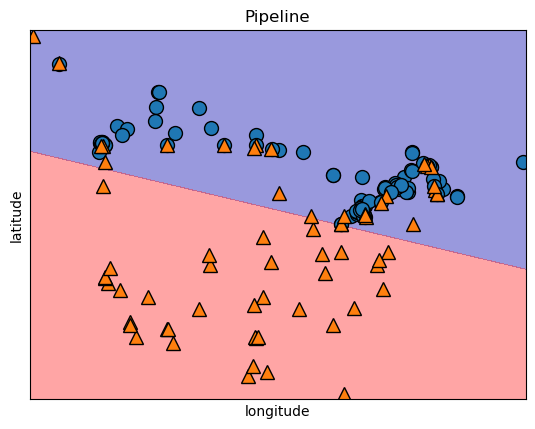

In [31]:
import matplotlib.pyplot as plt
import mglearn
log_pipe.fit(X_train, y_train)
mglearn.discrete_scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train)
mglearn.plots.plot_2d_separator(log_pipe, X_train.to_numpy(), fill=True, eps=0.5, alpha=0.4)
plt.title(log_pipe.__class__.__name__)
plt.xlabel("longitude")
plt.ylabel("latitude");

If we look at some other models that we did this in comparison for you can understand a bit more on why we call Logistic Regression a “linear classifier”.

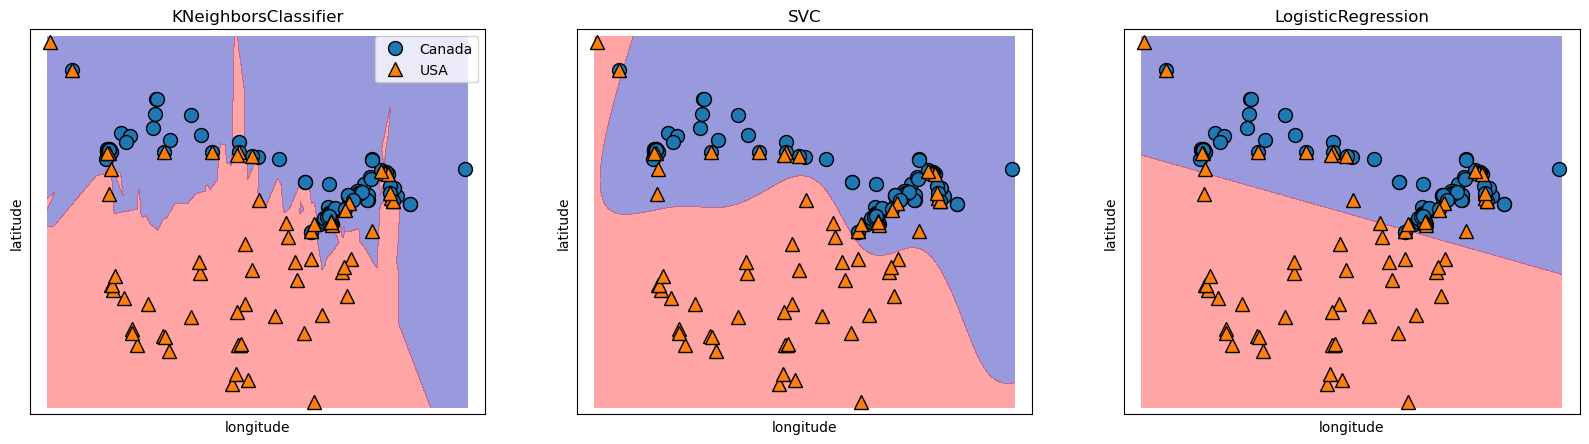

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for model, ax in zip(
    [KNeighborsClassifier(), SVC(gamma=0.01), LogisticRegression()], axes
):
    clf = model.fit(X_train.to_numpy(), y_train)
    mglearn.plots.plot_2d_separator(
        clf, X_train.to_numpy(), fill=True, eps=0.5, ax=ax, alpha=0.4
    )
    mglearn.discrete_scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], y_train, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")
axes[0].legend();

Notice a linear decision boundary (a line in our case).

### Coefficients 

Just like we saw for `Ridge`. we can get the equation of that line and the coefficients of our `latitude` and `longitude` features using `.coef_`.

In [33]:
logr_step_pipe = log_pipe.named_steps['logisticregression']

In [34]:
print("Model coefficients:", logr_step_pipe.coef_)
print("Model intercept:", logr_step_pipe.intercept_)

Model coefficients: [[-0.72330355 -1.64254763]]
Model intercept: [-0.30837315]


In [35]:
data = {'features': X_train.columns, 'coefficients':logr_step_pipe.coef_[0]}
pd.DataFrame(data)

,features,coefficients
0,longitude,-0.723304
1,latitude,-1.642548


In this case, we see that both are negative coefficients. 

We also can see that the coefficient of latitude is larger in magnitude than that of longitude. 

This makes a lot of sense because Canada as a country lies above the USA and so we expect `latitude` values to contribute more to a prediction than `longitude` which Canada and the `USA` have quite similar values.

### Predictions

Above we said that larger coefficients "contribute" more to the prediction than smaller ones for `Ridge`. What is the analog for logistic regression?

With logistic regression, the model randomly assigns one of the classes as the positive class and the other as negative. 

Here since "Canada" comes first when we call `.classes_` it is the "negative class and `USA` is the positive class. (This is in alphabetical order). 

In [36]:
logr_step_pipe.classes_

array(['Canada', 'USA'], dtype=object)

When it comes to the coefficients, when there is a positive coefficient, increasing that feature will make our prediction more positive which means our prediction is going to lean more toward the positive class (in this case `USA`).

Ok, let's take an example from our test set and calculate the outcome using our coefficients and intercept. 

In [37]:
example = X_test.iloc[0,:]
example.tolist()

[-64.8001, 46.098]

We can do this the exact same way as we did for Ridge. 

In [38]:
(example.tolist() * logr_step_pipe.coef_).sum(axis=1) + logr_step_pipe.intercept_ 

array([-29.15639126])

We get a value of -29.15639126. 

What does that mean? I thought we were predicting a class? 

For logistic regression, we check the **sign** of the calculation only.

If the result was positive, it predicts one class; if negative, it predicts the other.

That means everything negative corresponds to "Canada" and everything positive predicts a class of "USA".

Since it's negative we predict `Canada`, which is our negative class. 

In [39]:
log_pipe.predict([example])

array(['Canada'], dtype=object)

Using `predict`, we can see that it predicts the negative class as well! 

These are "hard predictions" but we can also use this for something called "soft predictions" as well. (Remember `predict_proba`? That's going to be coming back in a second) 

### Logistic Regression Hyperparameter `C`

At this point, you should be feeling pretty comfortable with hyperparameters. 

We saw that `Ridge` has the hyperparameter `alpha`, well `C` (annoyingly) has the opposite effect on the fundamental trade-off. 

In general, we say smaller `C` leads to a less complex model (whereas with `Ridge`, lower `alpha` means higher complexity). 

Higher values of `C` leads to more overfitting and lower values to less overfitting. 

In [40]:
scores_dict ={
    "C" :10.0**np.arange(-6,2,1),
    "train_score" : list(),
    "cv_score" : list(),
}

for C in scores_dict['C']:
    lr_model = LogisticRegression(C=C)
    results = cross_validate(lr_model, X_train, y_train, return_train_score=True)
    scores_dict['train_score'].append(results["train_score"].mean())
    scores_dict['cv_score'].append(results["test_score"].mean())

pd.DataFrame(scores_dict)

,C,train_score,cv_score
0,0.000001,0.598810,0.598930
1,0.000010,0.598810,0.598930
2,0.000100,0.664707,0.658645
3,0.001000,0.784424,0.790731
4,0.010000,0.827842,0.826203
5,0.100000,0.832320,0.820143
6,1.000000,0.832320,0.820143
7,10.000000,0.832320,0.820143


`LogisticRegression`'s default `C` hyperparameter is 1. 

Let's see what kind of value we get if we do `RandomizedGrid`. 

In [41]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "logisticregression__C": scipy.stats.uniform(0, 100)}

grid_search = RandomizedSearchCV(log_pipe, param_grid, cv=5, return_train_score=True, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [42]:
grid_search.best_params_

{'logisticregression__C': 15.369430500779647}

In [43]:
grid_search.best_score_

0.8201426024955436

### Predicting probabilities 

we saw that we can make "hard predictions" with logistic regression using `predict` but logistic regression also can make something called "soft predictions". 

We saw this when we use `predict_proba` in naive Bayes. These are called "soft predictions" because instead of predicting a specific class, the model returns a probability for each class.

In [44]:
log_pipe.predict(X_test[:1])

array(['Canada'], dtype=object)

I just want to state here we are using our pipeline to make a prediction but we could have also used our `grid_search` object that calls `log_pipe` to make the prediction as well. 

In [45]:
grid_search.predict(X_test[:1])

array(['Canada'], dtype=object)

We could also have called a simple model without the scaling if we did: 

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test[:1])

array(['Canada'], dtype=object)

And now with`predict_proba`: 

In [47]:
log_pipe.predict_proba(X_test[:1])

array([[0.86175442, 0.13824558]])

In [48]:
grid_search.predict_proba(X_test[:1])

array([[0.87765906, 0.12234094]])

In [49]:
lr.predict_proba(X_test[:1])

array([[0.87848688, 0.12151312]])

Let's look at the last one where we predict with `lr`:

So these "probabilities" correspond to the classes in the same order as `.classes_`

In [50]:
lr.classes_

array(['Canada', 'USA'], dtype=object)

This returns an array with a probability of how confident the model is for each target class.

We can see that the model is 87.8% sure that example 1 is class 0 ("Canada") and 12.15% confident that example 1 is class 0 ("USA"). 

We are going to call these values a probability *score*. It is a score that takes the form of a probability. Take it with a grain of salt. 

We don't want to say "I am 88% sure that this example is 'Canada'" That's too in-depth here, but we can say that we are more sure of one class than another.

`predict` works by predicting the class with the highest probability.

### How is this being done?

For linear regression we used something like this: 

$\text{predicted(value)} = \text{coefficient}_\text{feature-1} * \text{feature-1} + \text{coefficient}_\text{feature-2} * \text{feature-2} + ... + \text{coefficient}_\text{feature-n} * \text{feature-n} + \text{intercept} $

But this is not suitable for probabilities,
since the linear model with extrapolate below 0 and above 1,
which are nonsense values for probabilities.

So how do we calculate these probability scores?

We need something that will:
1. Make our predictions bounded between 0 and 1 (since probabilities as between 0 and 1)
2. Make our predictions change rapidly around 0.5 (the threshold) and slower away from 0.5 (to allow efficient classification).

Enter -> **The sigmoid function**!

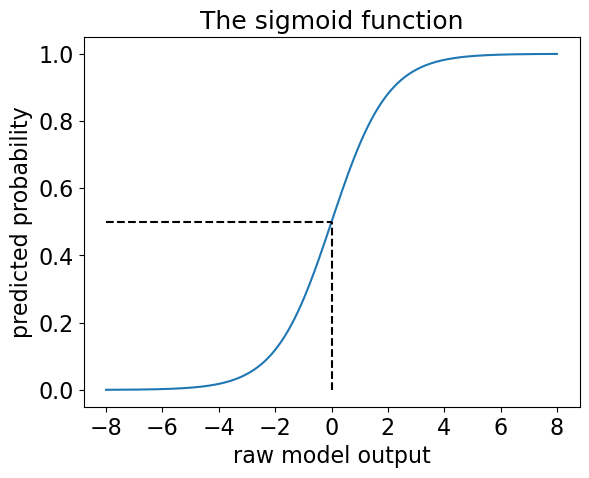

In [51]:
sigmoid = lambda x: 1/(1+np.exp(-x))
raw_model_output = np.linspace(-8,8,1000)
plt.plot(raw_model_output, sigmoid(raw_model_output));
plt.plot([0,0],[0,0.5], '--k')
plt.plot([-8,0],[0.5,0.5], '--k')
plt.xticks(fontsize= 16);
plt.yticks(fontsize= 16);
plt.xlabel("raw model output", fontsize=16); 
plt.ylabel("predicted probability", fontsize=16);
plt.title("The sigmoid function", fontsize=18);

If we now compare `predict` with `predict_proba` we can see how `predict` made a prediction based on the probabilities.

In [52]:
predict_y = lr.predict(X_train)
predict_y[-5:]

array(['Canada', 'Canada', 'USA', 'Canada', 'Canada'], dtype=object)

In [53]:
y_proba = lr.predict_proba(X_train)
y_proba[-5:]

array([[0.69848481, 0.30151519],
       [0.76970638, 0.23029362],
       [0.05301712, 0.94698288],
       [0.63294488, 0.36705512],
       [0.81540165, 0.18459835]])

Here we can look at the first column and if the probability is greater than 0.5, our `predict` function predicts the target of Canada and if the probability is lower than 0.5, it predicts `USA`.

Let's take a look and compare them to the actual correct labels. 

In [54]:
data_dict = {"y":y_train, 
             "pred y": predict_y.tolist(),
             "probabilities": y_proba.tolist()}
pd.DataFrame(data_dict).tail(10)

,y,pred y,probabilities
96,Canada,Canada,"[0.7047596510140418, 0.2952403489859582]"
57,USA,USA,"[0.03121394423109458, 0.9687860557689054]"
123,Canada,Canada,"[0.6537036743991862, 0.3462963256008138]"
106,Canada,Canada,"[0.844426786719836, 0.15557321328016402]"
83,Canada,Canada,"[0.6537036743991862, 0.3462963256008138]"
17,USA,Canada,"[0.6984848138411375, 0.3015151861588626]"
98,Canada,Canada,"[0.769706381275301, 0.23029361872469897]"
66,USA,USA,"[0.053017116268726405, 0.9469828837312736]"
126,Canada,Canada,"[0.6329448842395049, 0.36705511576049504]"
109,Canada,Canada,"[0.8154016516676702, 0.1845983483323298]"


We can see that in the example at index 17, the model incorrectly predicted as "Canada" instead of "USA" but we also see that the model was not extremely confident in this prediction. It was 69.8% confident. 

For the rest of this selection, the model corrected predicted each city but the model was more confident in some than others. 

### Decision boundaries with `predict_proba`

When we use `predict`, we get a decision boundary with either blue or red background a colour for each class we are predicting. 

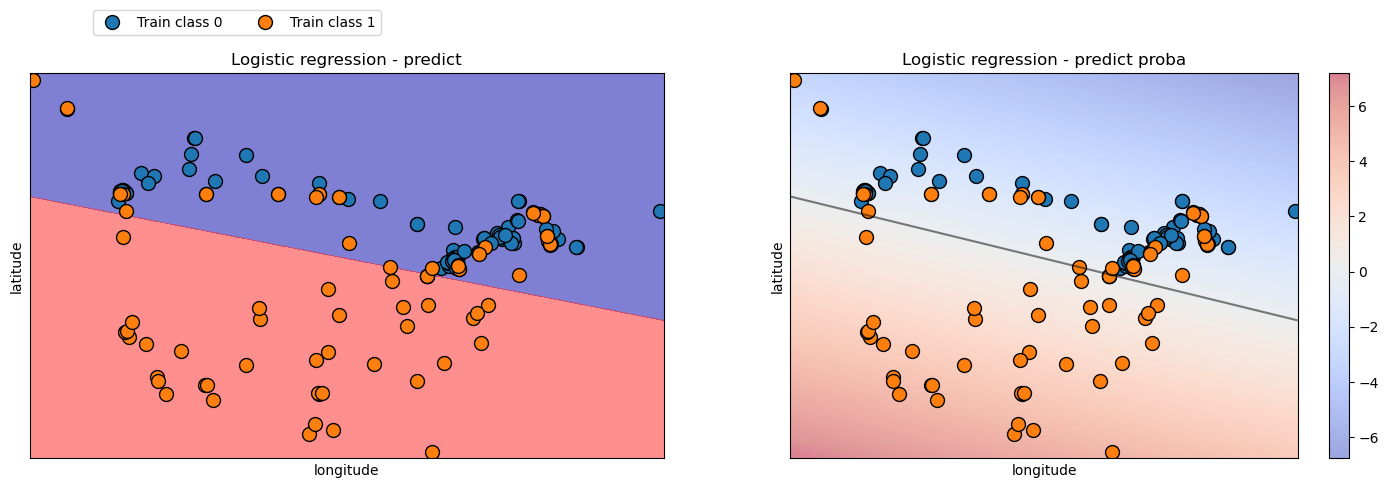

In [56]:
from matplotlib.colors import ListedColormap
fig, axes = plt.subplots(1, 2, figsize=(18, 5))    
for ax in axes:
    mglearn.discrete_scatter(
        X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], y_train, markers="o", ax=ax
    )
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")
    
axes[0].legend(["Train class 0", "Train class 1"], ncol=2, loc=(0.1, 1.1))
    
mglearn.plots.plot_2d_separator(
    lr, X_train.to_numpy(), fill=True, eps=0.5, ax=axes[0], alpha=0.5
)
axes[0].set_title("Logistic regression - predict")
mglearn.plots.plot_2d_separator(
    lr, X_train.to_numpy(), fill=False, eps=0.5, ax=axes[1], alpha=0.5
)
axes[1].set_title("Logistic regression - predict proba")
scores_image = mglearn.tools.plot_2d_scores(
    lr, X_train.to_numpy(), eps=0.5, ax=axes[1], alpha=0.5, cm=plt.cm.coolwarm
)

cbar = plt.colorbar(scores_image, ax=ax)

With probabilities using `predict_proba`,  we can now use a colour to represent the probability, a scale.     
We can see that the model is less confident the closer the observations are to the decision boundary. 

Let's find some examples where the model is pretty confident in its predictions.

This time, when we make our dataframe, we are only bringing in the probability of predicting "Canada". This is because if we are 10% confident a prediction is "Canada", the model is 90% confident in "USA".

In [52]:
lr_targets = pd.DataFrame({"y":y_train,
                           "pred y": predict_y.tolist(),
                           "probability_canada": y_proba[:,0].tolist()})
lr_targets.head(3)

,y,pred y,probability_canada
160,Canada,Canada,0.704607
127,Canada,Canada,0.563017
169,Canada,Canada,0.838968


In [53]:
lr_targets.sort_values(by='probability_canada')

,y,pred y,probability_canada
37,USA,USA,0.006547
78,USA,USA,0.007685
34,USA,USA,0.008317
41,USA,USA,0.008958
38,USA,USA,0.009194
...,...,...,...
149,Canada,Canada,0.924004
81,Canada,Canada,0.931792
0,USA,Canada,0.932487
165,Canada,Canada,0.951092


Here we can see both extremes. 

At the bottom are the observations the model is most confident the class is Canada, and at the top, we can see the observations the model was least confident the class is Canada which is the same saying the most confident in USA. 

We are 99.345% (1- 0.006547) confident that city 37 is "USA" and 96.19% confident that city 1 is "Canada". 

The model got the first example right, but the second one, wrong.

Let's plot this and see why. 

In [54]:
train_df.loc[[1,37]]

,longitude,latitude,country
1,-134.4197,58.3019,USA
37,-98.4951,29.4246,USA


I am get each of these observations by calling the index of each city on our training dataset.

The top one is index 37 and the bottom one is index 1.

In [55]:
y_train.loc[[1,37]]

1     USA
37    USA
Name: country, dtype: object

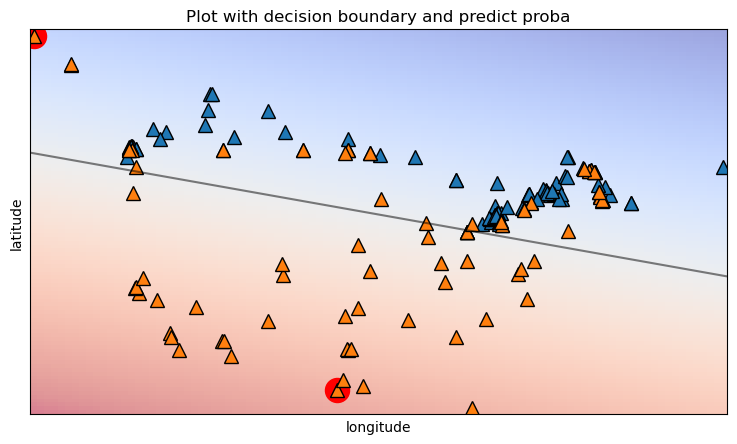

In [56]:
fig, ax = plt.subplots(figsize=(9, 5))
from matplotlib.colors import ListedColormap

mglearn.discrete_scatter(
    X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], y_train, markers="^", ax=ax
)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Highlight the points at indices 1 and 37
highlight = X_train.loc[[1,37]].to_numpy()
ax.scatter(highlight[:, 0], highlight[:, 1], color='red', s=300)

ax.set_xlim((-150,-50))  # Set x-axis limits
ax.set_xticks(np.arange(-150, -50, 10))  # Set x-axis ticks

mglearn.plots.plot_2d_separator(
    lr, X_train.to_numpy(), fill=False, eps=0.5, ax=ax, alpha=0.5
)
ax.set_title('Plot with decision boundary and predict proba')  # Subtitle for the plot

scores_image = mglearn.tools.plot_2d_scores(
    lr, X_train.to_numpy(), eps=0.5, ax=ax, alpha=0.5, cm=plt.cm.coolwarm
)

Both points are "USA" cities but we can now see why the model was so confident in its predictions for both cities.

The "USA" city it got wrong is likely in Alaska but the model doesn't know that and predicts more so on how close and on which side it lies to the decision boundary. 

Let's now find an example where the model is less certain on its prediction. 

We can do this by finding the absolute value of the difference between the two probabilities. 

The smaller the value, the more uncertain the model is. 

In [57]:
lr_targets = pd.DataFrame({"y":y_train,
                           "pred y": predict_y.tolist(),
                           "prob_difference": (abs(y_proba[:,0] - y_proba[:,1])).tolist()})
lr_targets.sort_values(by="prob_difference").head()

,y,pred y,prob_difference
61,USA,USA,0.001719
54,USA,USA,0.020025
13,USA,USA,0.020025
130,Canada,USA,0.022234
92,Canada,USA,0.022234


Here we can see that city 61 and 54 have the model pretty stumped. 

Let's plot them and see why.

In [58]:
train_df.loc[[61, 54]]

,longitude,latitude,country
61,-87.9225,43.0350,USA
54,-83.0466,42.3316,USA


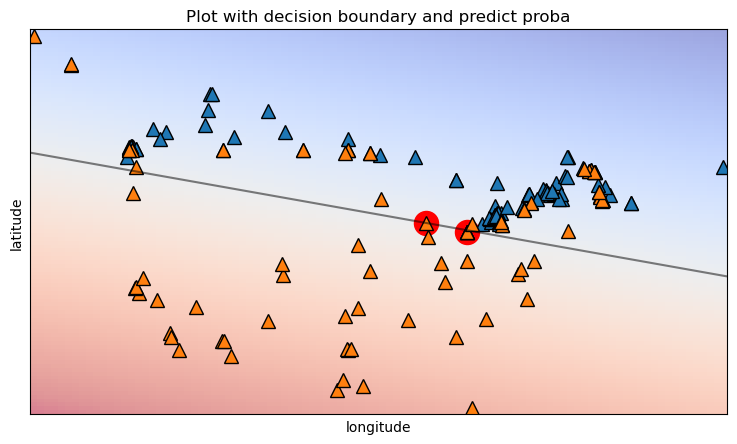

In [59]:
fig, ax = plt.subplots(figsize=(9, 5))
from matplotlib.colors import ListedColormap

mglearn.discrete_scatter(
    X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], y_train, markers="^", ax=ax,
)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Highlight the points at indices 61 and 54
highlight = X_train.loc[[61,54]].to_numpy()
ax.scatter(highlight[:, 0], highlight[:, 1], color='red', s=300)

ax.set_xlim((-150,-50))  # Set x-axis limits
ax.set_xticks(np.arange(-150, -50, 10))  # Set x-axis ticks

mglearn.plots.plot_2d_separator(
    lr, X_train.to_numpy(), fill=False, eps=0.5, ax=ax, alpha=0.5
)
ax.set_title('Plot with decision boundary and predict proba')  # Subtitle for the plot

scores_image = mglearn.tools.plot_2d_scores(
    lr, X_train.to_numpy(), eps=0.5, ax=ax, alpha=0.5, cm=plt.cm.coolwarm
)

Plot the cities with the decision boundary, helps us understand why.

The cities lie almost completely on the boundary, this makes the model very divided on how to classify them.

## Limitations of linear classifiers 

- Is your data "linearly separable"? Can you draw a hyperplane between these datapoints that separates them with low error? 
- If the training examples can be separated by a linear decision rule, they are **linearly separable**.

... but sometimes are data just can't be linearly separated well and hence these models will not perform well
unless we first perform relevant high dimensional transformations on the input features.


## Compare to naive Bayes

- Both are simple, fast, probabilistic classifiers.
- Both work well with large numbers of features.
- Naive Bayes has overly strong conditional independence assumptions. So it is not great when features are correlated. 
- Logistic regression is much more robust to correlated features.

## Let's Practice 

1\. We have the following text, which we wish to classify as either a positive or negative movie review.        
Using the words below (which are features in our model) with associated coefficients, answer the next 2 questions.        
The input for the feature value is the number of times the word appears in the review.     


|   Word            | Coefficient | 
|--------------------|-------------|
|excellent           | 2.2         | 
|disappointment      | -2.4        |
|flawless            | 1.4         |
|boring              | -1.3        |
|unwatchable         | -1.7        |

`Intercept = 1.3`

What value do you calculate after using the weights in the model above for the above review?     

***I thought it was going to be excellent but instead, it was unwatchable and boring.***    

The input feature value would be the number of times the word appears in the review (like `CountVectorizer`).   

2\. Would the model classify this review as a positive or negative review (classes are specified alphabetically) ?     
We are trying to predict if a job applicant would be hired based on some features contained in their resume.     
Below we have the output of `.predict_proba()` where column 0 shows the probability the model would predict "hired" and column 1 shows the probability the model would predict "not hired".     

```
array([[0.04971843, 0.95028157],
       [0.94173513, 0.05826487],
       [0.74133975, 0.25866025],
       [0.13024982, 0.86975018],
       [0.17126403, 0.82873597]])
```

Use this output to answer the following questions.        

3\. If we had used `.predict()` for these examples instead of `.predict_proba()`, how many of the examples would the model have predicted "hired"?     
4\. If the true class labels are below, how many examples would the model have correctly predicted with `predict()`?     

```
['hired', 'hired', 'hired', 'not hired', 'not hired']
```

**True or False:**        
5\. Increasing logistic regression's `C` hyperparameter increases the model's complexity.      
6\. Unlike with `Ridge` regression, coefficients are not interpretable with logistic regression.       
7\.  `predict` returns the positive class if the predicted probability of the positive class is greater than 0.5.       
8\. In logistic regression, a function is applied to convert the raw model output into probabilities.      


```{admonition} Solutions!
:class: dropdown

1. 0.5
2. Positive review
3. 2
4. 4
5. True
6. False
7. True
8. True
```

## Let's Practice - Coding

Let’s import the Pokémon dataset from our `data` folder. We want to see how well our model does with logistic regression. Let’s try building a simple model with default parameters.

In [60]:
from sklearn.compose import make_column_transformer

pk_df = pd.read_csv('data/pokemon.csv')

train_df, test_df = train_test_split(pk_df, test_size=0.2, random_state=1)

X_train = train_df.drop(columns=['legendary'])
y_train = train_df['legendary']
X_test = test_df.drop(columns=['legendary'])
y_test = test_df['legendary']


numeric_features = ["attack",
                    "defense" ,
                    "sp_attack",
                    "sp_defense",
                    "speed",
                    "capture_rt"]

drop_features = ["type", "deck_no", "gen", "name", "total_bs"]

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessor = make_column_transformer(
    ("drop", drop_features),
    (numeric_transformer, numeric_features)
)

1. Build and fit a pipeline containing the preprocessor column transformer and a logistic regression model using the parameter class_weight="balanced" (this reduces the error on classes that only have a few observations in the data, you will learn about this in lecture 9!).
2. Score your model on the test set.
3. Find the model's feature coefficients and answer the below questions 
    - Which feature contributes the most in predicting if an example is legendary or not.
    - As the capture rate value increases, will the model more likely predict a legendary or not legendary Pokémon?

**Solutions**

1\.

In [61]:
pipe = make_pipeline(
    preprocessor,
    LogisticRegression(class_weight='balanced')
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('drop', 'drop',
                                                  ['type', 'deck_no', 'gen',
                                                   'name', 'total_bs']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['attack', 'defense',
                                                   'sp_attack', 'sp_defense',
                                                   'speed', 'capture_rt'])])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

2\.

In [62]:
pipe.score(X_test, y_test)

0.9006211180124224

3\.

In [63]:
pd.DataFrame(
    pipe['logisticregression'].coef_[0],  # There is one level of nesting which is why we use [0]
    index=X_train.drop(columns=drop_features).columns,
    columns=['Coefficients']
)

,Coefficients
attack,0.690834
defense,1.126300
sp_attack,1.026617
sp_defense,0.655162
speed,1.116679
capture_rt,-0.792950


```{toggle}
Since the data is normalize we can directly compare the coefficients
to find out which feature impact the target variable the most.
The biggest absolute coefficient value are in `defense` and `speed`,
so variation in these values will change the target value the most.

The model is *less* likely to predict "legendary" the higher the capture rate gets
(the coefficient is negative).
```

## What We've Learned Today

- The name of the function used to bound our values between 0 and 1
- How `predict_proba` can be particularly useful when it comes to Logistic Regression. 
- The advantages and limitations of linear classifiers. 
- How to use `scikit-learn`'s `LogisticRegression` classifier.
- One of the hyperparameters of `Ridge` (`alpha`)
- One of the hyperparameters of `LogisticRegression` (`C`).
- How logistic regression is compared to naive Bayes.